In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.tree 
from scipy.stats import randint
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import graphviz

In [2]:
data = pd.read_csv('thyroid_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         7200 non-null   float64
 1    Sex                        7200 non-null   int64  
 2    On_thyroxine               7200 non-null   int64  
 3    Query_on_thyroxine         7200 non-null   int64  
 4    On_antithyroid_medication  7200 non-null   int64  
 5    Sick                       7200 non-null   int64  
 6    Pregnant                   7200 non-null   int64  
 7    Thyroid_surgery            7200 non-null   int64  
 8    I131_treatment             7200 non-null   int64  
 9    Query_hypothyroid          7200 non-null   int64  
 10   Query_hyperthyroid         7200 non-null   int64  
 11   Lithium                    7200 non-null   int64  
 12   Goitre                     7200 non-null   int64  
 13   Tumor                      7200 

In [4]:
#The task is to detect is a given patient is normal (1) or suffers from hyperthyroidism (2) or hypothyroidism (3)
X = data[data.columns.difference(['Class'])]
y = data.Class

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
features = list(X_train.columns.values)
classes = [
             'normal',
             'hyperthyroidism',
             'hypothyroidism'
            ]

## Decision trees

In [17]:
## Tuning hyperparameter
clf = DecisionTreeClassifier()
param_dist = {"max_depth": randint(2,4),
              "min_samples_leaf": randint(1, 5),
              "min_samples_split": randint(2, 6)}

kfold = KFold(n_splits = 5, random_state = None)
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,scoring = 'accuracy',
                                   n_iter=25, cv=kfold)
random_search.fit(X, y)
print(random_search.best_params_)

{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 3}


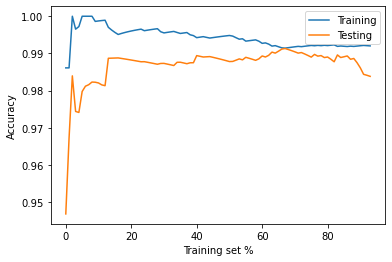

In [19]:
list1=[]
list2=[]
for i in range(1,95):
    clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf = 2, min_samples_split= 3)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1-i/100)
    clf = clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    list1.append(accuracy_score(y_train, train_predict))
    list2.append(accuracy_score(y_test, test_predict))
plt.plot(range(len(list1)),list1,label="Training")
plt.plot(range(len(list2)),list2,label="Testing")
plt.xlabel("Training set %")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

In [8]:
with open("dt.dot", "w") as f:
    f = tree.export_graphviz(clf,feature_names = features,  class_names=classes, filled = True, out_file=f)

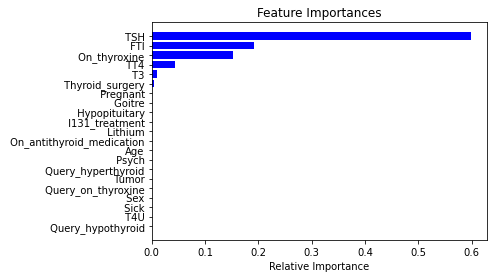

In [12]:
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Neural networks

In [23]:
##
clf = MLPClassifier()
kfold = KFold(n_splits = 5, random_state = None)
param_dist = {"solver" : ['lbfgs', 'sgd', 'adam'],
              "activation" : ['identity', 'logistic', 'tanh', 'relu'],
              "alpha": [0.0001, 0.05],
              "hidden_layer_sizes": [(15,10,5),(10,5,3),(5,2),(4,)],
              'learning_rate': ['constant','adaptive']
              }
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=25, cv=kfold,verbose = 10)
random_search.fit(X, y)
print(random_search.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] solver=adam, learning_rate=constant, hidden_layer_sizes=(5, 2), alpha=0.05, activation=logistic 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  solver=adam, learning_rate=constant, hidden_layer_sizes=(5, 2), alpha=0.05, activation=logistic, score=0.935, total=   0.7s
[CV] solver=adam, learning_rate=constant, hidden_layer_sizes=(5, 2), alpha=0.05, activation=logistic 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  solver=adam, learning_rate=constant, hidden_layer_sizes=(5, 2), alpha=0.05, activation=logistic, score=0.922, total=   0.6s
[CV] solver=adam, learning_rate=constant, hidden_layer_sizes=(5, 2), alpha=0.05, activation=logistic 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV]  solver=adam, learning_rate=constant, hidden_layer_sizes=(5, 2), alpha=0.05, activation=logistic, score=0.924, total=   1.1s
[CV] solver=adam, learning_rate=constant, hidden_layer_sizes=(5, 2), alpha=0.05, activation=logistic 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s remaining:    0.0s


[CV]  solver=adam, learning_rate=constant, hidden_layer_sizes=(5, 2), alpha=0.05, activation=logistic, score=0.917, total=   0.7s
[CV] solver=adam, learning_rate=constant, hidden_layer_sizes=(5, 2), alpha=0.05, activation=logistic 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.2s remaining:    0.0s


[CV]  solver=adam, learning_rate=constant, hidden_layer_sizes=(5, 2), alpha=0.05, activation=logistic, score=0.931, total=   0.8s
[CV] solver=adam, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.0001, activation=relu 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.0s remaining:    0.0s
/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.3s remaining:    0.0s


[CV]  solver=adam, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.0001, activation=relu, score=0.974, total=   3.3s
[CV] solver=adam, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.0001, activation=relu 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   10.6s remaining:    0.0s


[CV]  solver=adam, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.0001, activation=relu, score=0.972, total=   3.3s
[CV] solver=adam, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.0001, activation=relu 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   13.8s remaining:    0.0s


[CV]  solver=adam, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.0001, activation=relu, score=0.976, total=   3.2s
[CV] solver=adam, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.0001, activation=relu 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   17.2s remaining:    0.0s


[CV]  solver=adam, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.0001, activation=relu, score=0.973, total=   3.4s
[CV] solver=adam, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.0001, activation=relu 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  solver=adam, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.0001, activation=relu, score=0.969, total=   3.4s
[CV] solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=identity 
[CV]  solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=identity, score=0.964, total=   0.3s
[CV] solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=identity 
[CV]  solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=identity, score=0.957, total=   0.3s
[CV] solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=identity 
[CV]  solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=identity, score=0.953, total=   0.3s
[CV] solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=identity 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=identity, score=0.940, total=   0.3s
[CV] solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=identity 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=identity, score=0.954, total=   0.4s
[CV] solver=adam, learning_rate=adaptive, hidden_layer_sizes=(10, 5, 3), alpha=0.05, activation=tanh 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  solver=adam, learning_rate=adaptive, hidden_layer_sizes=(10, 5, 3), alpha=0.05, activation=tanh, score=0.985, total=   2.7s
[CV] solver=adam, learning_rate=adaptive, hidden_layer_sizes=(10, 5, 3), alpha=0.05, activation=tanh 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  solver=adam, learning_rate=adaptive, hidden_layer_sizes=(10, 5, 3), alpha=0.05, activation=tanh, score=0.977, total=   2.7s
[CV] solver=adam, learning_rate=adaptive, hidden_layer_sizes=(10, 5, 3), alpha=0.05, activation=tanh 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  solver=adam, learning_rate=adaptive, hidden_layer_sizes=(10, 5, 3), alpha=0.05, activation=tanh, score=0.973, total=   2.8s
[CV] solver=adam, learning_rate=adaptive, hidden_layer_sizes=(10, 5, 3), alpha=0.05, activation=tanh 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  solver=adam, learning_rate=adaptive, hidden_layer_sizes=(10, 5, 3), alpha=0.05, activation=tanh, score=0.972, total=   2.7s
[CV] solver=adam, learning_rate=adaptive, hidden_layer_sizes=(10, 5, 3), alpha=0.05, activation=tanh 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  solver=adam, learning_rate=adaptive, hidden_layer_sizes=(10, 5, 3), alpha=0.05, activation=tanh, score=0.964, total=   2.8s
[CV] solver=sgd, learning_rate=constant, hidden_layer_sizes=(5, 2), alpha=0.05, activation=relu 
[CV]  solver=sgd, learning_rate=constant, hidden_layer_sizes=(5, 2), alpha=0.05, activation=relu, score=0.935, total=   1.8s
[CV] solver=sgd, learning_rate=constant, hidden_layer_sizes=(5, 2), alpha=0.05, activation=relu 
[CV]  solver=sgd, learning_rate=constant, hidden_layer_sizes=(5, 2), alpha=0.05, activation=relu, score=0.922, total=   0.4s
[CV] solver=sgd, learning_rate=constant, hidden_layer_sizes=(5, 2), alpha=0.05, activation=relu 
[CV]  solver=sgd, learning_rate=constant, hidden_layer_sizes=(5, 2), alpha=0.05, activation=relu, score=0.924, total=   0.4s
[CV] solver=sgd, learning_rate=constant, hidden_layer_sizes=(5, 2), alpha=0.05, activation=relu 
[CV]  solver=sgd, learning_rate=constant, hidden_layer_sizes=(5, 2), alpha=0.05, activation=relu, score=0.9

/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(10, 5, 3), alpha=0.05, activation=tanh, score=0.974, total=   0.7s
[CV] solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(10, 5, 3), alpha=0.05, activation=tanh 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(10, 5, 3), alpha=0.05, activation=tanh, score=0.976, total=   0.7s
[CV] solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(10, 5, 3), alpha=0.05, activation=tanh 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(10, 5, 3), alpha=0.05, activation=tanh, score=0.978, total=   0.7s
[CV] solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(10, 5, 3), alpha=0.05, activation=tanh 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(10, 5, 3), alpha=0.05, activation=tanh, score=0.967, total=   0.7s
[CV] solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(10, 5, 3), alpha=0.05, activation=tanh 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(10, 5, 3), alpha=0.05, activation=tanh, score=0.969, total=   0.7s
[CV] solver=adam, learning_rate=constant, hidden_layer_sizes=(4,), alpha=0.0001, activation=tanh 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  solver=adam, learning_rate=constant, hidden_layer_sizes=(4,), alpha=0.0001, activation=tanh, score=0.950, total=   1.7s
[CV] solver=adam, learning_rate=constant, hidden_layer_sizes=(4,), alpha=0.0001, activation=tanh 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  solver=adam, learning_rate=constant, hidden_layer_sizes=(4,), alpha=0.0001, activation=tanh, score=0.944, total=   1.7s
[CV] solver=adam, learning_rate=constant, hidden_layer_sizes=(4,), alpha=0.0001, activation=tanh 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  solver=adam, learning_rate=constant, hidden_layer_sizes=(4,), alpha=0.0001, activation=tanh, score=0.944, total=   1.7s
[CV] solver=adam, learning_rate=constant, hidden_layer_sizes=(4,), alpha=0.0001, activation=tanh 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  solver=adam, learning_rate=constant, hidden_layer_sizes=(4,), alpha=0.0001, activation=tanh, score=0.927, total=   1.7s
[CV] solver=adam, learning_rate=constant, hidden_layer_sizes=(4,), alpha=0.0001, activation=tanh 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  solver=adam, learning_rate=constant, hidden_layer_sizes=(4,), alpha=0.0001, activation=tanh, score=0.938, total=   1.7s
[CV] solver=adam, learning_rate=adaptive, hidden_layer_sizes=(15, 10, 5), alpha=0.0001, activation=logistic 
[CV]  solver=adam, learning_rate=adaptive, hidden_layer_sizes=(15, 10, 5), alpha=0.0001, activation=logistic, score=0.935, total=   0.5s
[CV] solver=adam, learning_rate=adaptive, hidden_layer_sizes=(15, 10, 5), alpha=0.0001, activation=logistic 
[CV]  solver=adam, learning_rate=adaptive, hidden_layer_sizes=(15, 10, 5), alpha=0.0001, activation=logistic, score=0.922, total=   0.6s
[CV] solver=adam, learning_rate=adaptive, hidden_layer_sizes=(15, 10, 5), alpha=0.0001, activation=logistic 
[CV]  solver=adam, learning_rate=adaptive, hidden_layer_sizes=(15, 10, 5), alpha=0.0001, activation=logistic, score=0.924, total=   0.8s
[CV] solver=adam, learning_rate=adaptive, hidden_layer_sizes=(15, 10, 5), alpha=0.0001, activation=logistic 
[CV]  solver=adam, learning

/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(4,), alpha=0.0001, activation=relu, score=0.972, total=   0.3s
[CV] solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(4,), alpha=0.0001, activation=relu 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(4,), alpha=0.0001, activation=relu, score=0.962, total=   0.3s
[CV] solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(4,), alpha=0.0001, activation=relu 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(4,), alpha=0.0001, activation=relu, score=0.957, total=   0.3s
[CV] solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(4,), alpha=0.0001, activation=relu 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(4,), alpha=0.0001, activation=relu, score=0.963, total=   0.3s
[CV] solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(4,), alpha=0.0001, activation=relu 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(4,), alpha=0.0001, activation=relu, score=0.976, total=   0.3s
[CV] solver=sgd, learning_rate=constant, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=relu 
[CV]  solver=sgd, learning_rate=constant, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=relu, score=0.935, total=   1.1s
[CV] solver=sgd, learning_rate=constant, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=relu 
[CV]  solver=sgd, learning_rate=constant, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=relu, score=0.922, total=   0.9s
[CV] solver=sgd, learning_rate=constant, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=relu 
[CV]  solver=sgd, learning_rate=constant, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=relu, score=0.924, total=   1.0s
[CV] solver=sgd, learning_rate=constant, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=relu 
[CV]  solver=sgd, learning_rate=constant, hidden_layer_sizes=(10, 5,

/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=identity, score=0.935, total=   2.2s
[CV] solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=identity 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=identity, score=0.922, total=   2.2s
[CV] solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=identity 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=identity, score=0.924, total=   2.2s
[CV] solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=identity 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=identity, score=0.917, total=   2.2s
[CV] solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=identity 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=identity, score=0.931, total=   2.2s
[CV] solver=sgd, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=relu 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  solver=sgd, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=relu, score=0.935, total=   2.9s
[CV] solver=sgd, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=relu 
[CV]  solver=sgd, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=relu, score=0.922, total=   1.3s
[CV] solver=sgd, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=relu 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  solver=sgd, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=relu, score=0.924, total=   2.9s
[CV] solver=sgd, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=relu 
[CV]  solver=sgd, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=relu, score=0.917, total=   0.9s
[CV] solver=sgd, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=relu 
[CV]  solver=sgd, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=relu, score=0.931, total=   0.7s
[CV] solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=relu 
[CV]  solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=relu, score=0.935, total=   1.7s
[CV] solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=relu 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=relu, score=0.922, total=   2.7s
[CV] solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=relu 
[CV]  solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=relu, score=0.924, total=   1.2s
[CV] solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=relu 
[CV]  solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=relu, score=0.917, total=   1.8s
[CV] solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=relu 
[CV]  solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(10, 5, 3), alpha=0.0001, activation=relu, score=0.931, total=   1.6s
[CV] solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=tanh 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=tanh, score=0.983, total=   0.9s
[CV] solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=tanh 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=tanh, score=0.977, total=   0.9s
[CV] solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=tanh 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=tanh, score=0.982, total=   0.9s
[CV] solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=tanh 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=tanh, score=0.969, total=   0.9s
[CV] solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=tanh 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=tanh, score=0.969, total=   0.9s
[CV] solver=lbfgs, learning_rate=adaptive, hidden_layer_sizes=(4,), alpha=0.0001, activation=relu 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, learning_rate=adaptive, hidden_layer_sizes=(4,), alpha=0.0001, activation=relu, score=0.978, total=   0.3s
[CV] solver=lbfgs, learning_rate=adaptive, hidden_layer_sizes=(4,), alpha=0.0001, activation=relu 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, learning_rate=adaptive, hidden_layer_sizes=(4,), alpha=0.0001, activation=relu, score=0.977, total=   0.3s
[CV] solver=lbfgs, learning_rate=adaptive, hidden_layer_sizes=(4,), alpha=0.0001, activation=relu 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, learning_rate=adaptive, hidden_layer_sizes=(4,), alpha=0.0001, activation=relu, score=0.974, total=   0.3s
[CV] solver=lbfgs, learning_rate=adaptive, hidden_layer_sizes=(4,), alpha=0.0001, activation=relu 
[CV]  solver=lbfgs, learning_rate=adaptive, hidden_layer_sizes=(4,), alpha=0.0001, activation=relu, score=0.955, total=   0.2s
[CV] solver=lbfgs, learning_rate=adaptive, hidden_layer_sizes=(4,), alpha=0.0001, activation=relu 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, learning_rate=adaptive, hidden_layer_sizes=(4,), alpha=0.0001, activation=relu, score=0.973, total=   0.3s
[CV] solver=sgd, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.0001, activation=tanh 
[CV]  solver=sgd, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.0001, activation=tanh, score=0.935, total=   0.4s
[CV] solver=sgd, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.0001, activation=tanh 
[CV]  solver=sgd, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.0001, activation=tanh, score=0.922, total=   1.0s
[CV] solver=sgd, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.0001, activation=tanh 
[CV]  solver=sgd, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.0001, activation=tanh, score=0.924, total=   0.5s
[CV] solver=sgd, learning_rate=constant, hidden_layer_sizes=(15, 10, 5), alpha=0.0001, activation=tanh 
[CV]  solver=sgd, learning_rate=constant, hidden_layer_sizes=

/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, learning_rate=adaptive, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=tanh, score=0.975, total=   0.9s
[CV] solver=lbfgs, learning_rate=adaptive, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=tanh 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, learning_rate=adaptive, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=tanh, score=0.974, total=   0.9s
[CV] solver=lbfgs, learning_rate=adaptive, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=tanh 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, learning_rate=adaptive, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=tanh, score=0.975, total=   1.0s
[CV] solver=lbfgs, learning_rate=adaptive, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=tanh 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, learning_rate=adaptive, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=tanh, score=0.966, total=   0.9s
[CV] solver=lbfgs, learning_rate=adaptive, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=tanh 


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  solver=lbfgs, learning_rate=adaptive, hidden_layer_sizes=(15, 10, 5), alpha=0.05, activation=tanh, score=0.968, total=   1.0s
[CV] solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(5, 2), alpha=0.05, activation=relu 
[CV]  solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(5, 2), alpha=0.05, activation=relu, score=0.935, total=   1.5s
[CV] solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(5, 2), alpha=0.05, activation=relu 
[CV]  solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(5, 2), alpha=0.05, activation=relu, score=0.922, total=   1.2s
[CV] solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(5, 2), alpha=0.05, activation=relu 
[CV]  solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(5, 2), alpha=0.05, activation=relu, score=0.924, total=   1.3s
[CV] solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(5, 2), alpha=0.05, activation=relu 
[CV]  solver=sgd, learning_rate=adaptive, hidden_layer_sizes=(5, 2), alpha=0.05, activation=relu, score=0

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  2.5min finished


{'solver': 'lbfgs', 'learning_rate': 'constant', 'hidden_layer_sizes': (15, 10, 5), 'alpha': 0.05, 'activation': 'tanh'}


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs faile

/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs faile

/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs faile

/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs faile

/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs faile

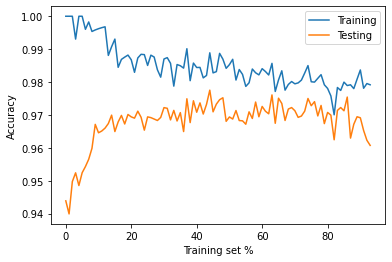

In [25]:
list1=[]
list2=[]
for i in range(1,95):
    clf = MLPClassifier(solver= 'lbfgs', 
                              learning_rate =  'constant', 
                              hidden_layer_sizes = (15, 10, 5),
                              alpha = 0.05,
                              activation = 'tanh'
                       )
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1-i/100)
    clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    list1.append(accuracy_score(y_train, train_predict))
    list2.append(accuracy_score(y_test, test_predict))

plt.plot(range(len(list1)),list1,label="Training")
plt.plot(range(len(list2)),list2,label="Testing")
plt.xlabel("Training set %")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

## Boosting

In [22]:
## 
clf = AdaBoostClassifier()
param_dist = {"n_estimators" : randint(1, 15),
              "learning_rate" : [0.1,0.5,1,5], 
              }
kfold = KFold(n_splits = 5, random_state = None)
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=25,cv=kfold,scoring = 'accuracy',verbose = 10)
random_search.fit(X, y)
print("Best hyperparameters are: ")
print(random_search.best_params_)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] learning_rate=0.1, n_estimators=1 ...............................
[CV] ... learning_rate=0.1, n_estimators=1, score=0.962, total=   0.0s
[CV] learning_rate=0.1, n_estimators=1 ...............................
[CV] ... learning_rate=0.1, n_estimators=1, score=0.951, total=   0.0s
[CV] learning_rate=0.1, n_estimators=1 ...............................
[CV] ... learning_rate=0.1, n_estimators=1, score=0.945, total=   0.0s
[CV] learning_rate=0.1, n_estimators=1 ...............................
[CV] ... learning_rate=0.1, n_estimators=1, score=0.957, total=   0.0s
[CV] learning_rate=0.1, n_estimators=1 ...............................
[CV] ... learning_rate=0.1, n_estimators=1, score=0.947, total=   0.0s
[CV] learning_rate=0.5, n_estimators=7 ...............................
[CV] ... learning_rate=0.5, n_estimators=7, score=0.990, total=   0.0s
[CV] learning_rate=0.5, n_estimators=7 ...............................
[CV] ... learni

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s


[CV] .. learning_rate=0.5, n_estimators=11, score=0.990, total=   0.0s
[CV] learning_rate=0.5, n_estimators=11 ..............................
[CV] .. learning_rate=0.5, n_estimators=11, score=0.992, total=   0.0s
[CV] learning_rate=0.5, n_estimators=11 ..............................
[CV] .. learning_rate=0.5, n_estimators=11, score=0.994, total=   0.0s
[CV] learning_rate=0.5, n_estimators=11 ..............................
[CV] .. learning_rate=0.5, n_estimators=11, score=0.988, total=   0.0s
[CV] learning_rate=0.5, n_estimators=11 ..............................
[CV] .. learning_rate=0.5, n_estimators=11, score=0.985, total=   0.0s
[CV] learning_rate=0.5, n_estimators=3 ...............................
[CV] ... learning_rate=0.5, n_estimators=3, score=0.984, total=   0.0s
[CV] learning_rate=0.5, n_estimators=3 ...............................
[CV] ... learning_rate=0.5, n_estimators=3, score=0.978, total=   0.0s
[CV] learning_rate=0.5, n_estimators=3 ...............................
[CV] .

[CV] .... learning_rate=5, n_estimators=12, score=0.923, total=   0.0s
[CV] learning_rate=5, n_estimators=12 ................................
[CV] .... learning_rate=5, n_estimators=12, score=0.947, total=   0.0s
[CV] learning_rate=5, n_estimators=12 ................................
[CV] .... learning_rate=5, n_estimators=12, score=0.918, total=   0.0s
[CV] learning_rate=5, n_estimators=12 ................................
[CV] .... learning_rate=5, n_estimators=12, score=0.935, total=   0.0s
[CV] learning_rate=0.5, n_estimators=6 ...............................
[CV] ... learning_rate=0.5, n_estimators=6, score=0.990, total=   0.0s
[CV] learning_rate=0.5, n_estimators=6 ...............................
[CV] ... learning_rate=0.5, n_estimators=6, score=0.992, total=   0.0s
[CV] learning_rate=0.5, n_estimators=6 ...............................
[CV] ... learning_rate=0.5, n_estimators=6, score=0.994, total=   0.0s
[CV] learning_rate=0.5, n_estimators=6 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    3.3s finished


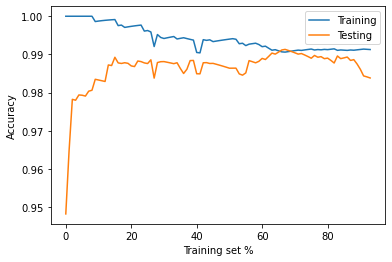

In [51]:
list1=[]
list2=[]
for i in range(1,95):
    clf = AdaBoostClassifier(n_estimators=7, learning_rate = 0.5)    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1-i/100)
    clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    list1.append(accuracy_score(y_train, train_predict))
    list2.append(accuracy_score(y_test, test_predict))
plt.plot(range(len(list1)),list1,label="Training")
plt.plot(range(len(list2)),list2,label="Testing")
plt.xlabel("Training set %")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()


## Support Vector Machines

In [44]:

clf = svm.SVC()
SVCtune = svm.SVC()
kfold = KFold(n_splits = 5, random_state = None)
SVCparams = [{'kernel': ['rbf'],'C': [0.1, 0.5, 1, 5, 10,20,30]}
             ,{'kernel': ['linear'], 'C': [0.1, 0.5, 1, 5, 10,20,30]}
             ,{'kernel': ['polynomial'], 'C': [0.1, 0.5, 1, 5, 10,20,30]}
            ]
SVCgs = RandomizedSearchCV(SVCtune, SVCparams, n_iter=25,cv=kfold,scoring = 'accuracy',verbose = 10)
SVCgs.fit(X, y)
print("Best params: ", SVCgs.best_params_)


/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 21 is smaller than n_iter=25. Running 21 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV] kernel=rbf, C=0.1 ...............................................
[CV] ................... kernel=rbf, C=0.1, score=0.935, total=   0.3s
[CV] kernel=rbf, C=0.1 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ................... kernel=rbf, C=0.1, score=0.922, total=   0.3s
[CV] kernel=rbf, C=0.1 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] ................... kernel=rbf, C=0.1, score=0.924, total=   0.3s
[CV] kernel=rbf, C=0.1 ...............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s


[CV] ................... kernel=rbf, C=0.1, score=0.917, total=   0.3s
[CV] kernel=rbf, C=0.1 ...............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s


[CV] ................... kernel=rbf, C=0.1, score=0.931, total=   0.3s
[CV] kernel=rbf, C=0.5 ...............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s remaining:    0.0s


[CV] ................... kernel=rbf, C=0.5, score=0.936, total=   0.3s
[CV] kernel=rbf, C=0.5 ...............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.9s remaining:    0.0s


[CV] ................... kernel=rbf, C=0.5, score=0.924, total=   0.3s
[CV] kernel=rbf, C=0.5 ...............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.2s remaining:    0.0s


[CV] ................... kernel=rbf, C=0.5, score=0.925, total=   0.3s
[CV] kernel=rbf, C=0.5 ...............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.5s remaining:    0.0s


[CV] ................... kernel=rbf, C=0.5, score=0.920, total=   0.3s
[CV] kernel=rbf, C=0.5 ...............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.8s remaining:    0.0s


[CV] ................... kernel=rbf, C=0.5, score=0.933, total=   0.3s
[CV] kernel=rbf, C=1 .................................................
[CV] ..................... kernel=rbf, C=1, score=0.940, total=   0.4s
[CV] kernel=rbf, C=1 .................................................
[CV] ..................... kernel=rbf, C=1, score=0.929, total=   0.4s
[CV] kernel=rbf, C=1 .................................................
[CV] ..................... kernel=rbf, C=1, score=0.929, total=   0.4s
[CV] kernel=rbf, C=1 .................................................
[CV] ..................... kernel=rbf, C=1, score=0.924, total=   0.3s
[CV] kernel=rbf, C=1 .................................................
[CV] ..................... kernel=rbf, C=1, score=0.933, total=   0.3s
[CV] kernel=rbf, C=5 .................................................
[CV] ..................... kernel=rbf, C=5, score=0.948, total=   0.3s
[CV] kernel=rbf, C=5 .................................................
[CV] .

[CV] ................. kernel=linear, C=30, score=0.951, total=   0.3s
[CV] kernel=linear, C=30 .............................................
[CV] ................. kernel=linear, C=30, score=0.933, total=   0.3s
[CV] kernel=linear, C=30 .............................................
[CV] ................. kernel=linear, C=30, score=0.943, total=   0.3s
[CV] kernel=polynomial, C=0.1 ........................................
[CV] .............. kernel=polynomial, C=0.1, score=nan, total=   0.0s
[CV] kernel=polynomial, C=0.1 ........................................
[CV] .............. kernel=polynomial, C=0.1, score=nan, total=   0.0s
[CV] kernel=polynomial, C=0.1 ........................................
[CV] .............. kernel=polynomial, C=0.1, score=nan, total=   0.0s
[CV] kernel=polynomial, C=0.1 ........................................
[CV] .............. kernel=polynomial, C=0.1, score=nan, total=   0.0s
[CV] kernel=polynomial, C=0.1 ........................................
[CV] .

/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Users/chenliang/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'polynomial' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/chenliang/opt/anacond

Best params:  {'kernel': 'linear', 'C': 30}


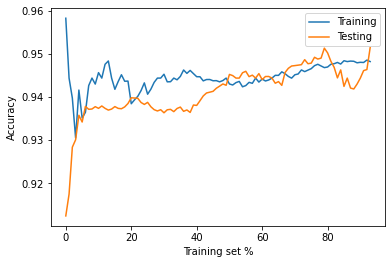

In [45]:
# SVM learning curve with RBF kernel
list1=[]
list2=[]
for i in range(1,95):
    clf = svm.SVC(kernel="linear", C=30)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=1-i/100)
    clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    list1.append(accuracy_score(y_train, train_predict))
    list2.append(accuracy_score(y_test, test_predict))
plt.plot(range(len(list1)),list1,label="Training")
plt.plot(range(len(list2)),list2,label="Testing")
plt.xlabel("Training set %")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()


## KNN

The optimal number of neighbors is 3


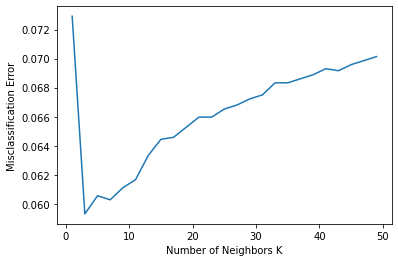

In [39]:
neighbors = list(range(1, 50, 2))
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,weights="distance" )
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

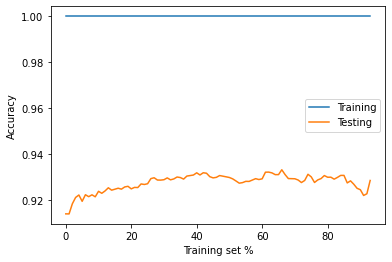

In [43]:
list1=[]
list2=[]
for i in range(1,95):
    clf = KNeighborsClassifier(3, weights="distance")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1-i/100)
    clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    list1.append(accuracy_score(y_train, train_predict))
    list2.append(accuracy_score(y_test, test_predict))
plt.plot(range(len(list1)),list1,label="Training")
plt.plot(range(len(list2)),list2,label="Testing")
plt.xlabel("Training set %")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()